# UNIT 9. Neural Networks

This Unit includes an introduction to neural networks, strongly based in {cite:p}`kroese2020`.

```{bibliography}
:style: unsrt
```

## A very simple first example of NN

[adapted from here](https://realpython.com/python-ai-neural-network/).

let us start by looking at the shape of a sigmoid function, that we will use later for the final layer of the classification NN

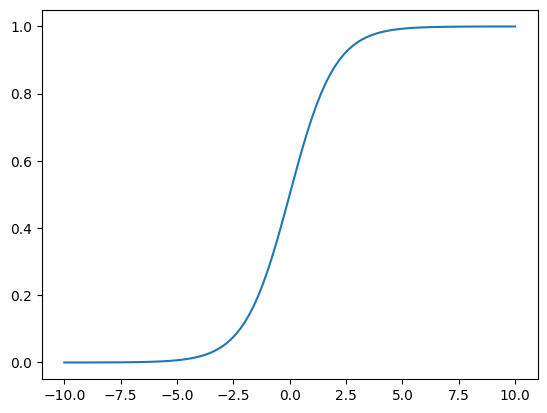

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 101)
plt.plot(x, 1/(1+np.exp(-x)))

In the following code, we have defined a first layer which simply contains weights for each of the feature values and we multiply both vectors with a dot product.
The second layer is a sigmoid function that decides if we choose a 0 or 1 as a result of the network.

The input data and the correct output are given here:

| item  |  feature 1 | feature 2 | ouput |
|-------|------------|-----------|-------|
|  1    |   1.66     |    1.56   |  1    |
|  2    |   2.00     |    1.5    |  0    |

and we will use as weights the vector $(1.45,-0.66)$ to predict the output of the two data points, plus a sigmoid function to classify in category 0 or 1.

In [2]:
import numpy as np

# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


the result was good, but for the second data point our prediction will be wrong

In [3]:
input_vector = np.array([2.00, 1.5])
prediction = make_prediction(input_vector, weights_1, bias)
print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


so... we need to train our network. In the process of training the neural network, we will first assess the error and then adjust the weights accordingly. To adjust the weights, we use the **gradient descent** and **backpropagation** algorithms. Gradient descent is applied to find the direction and the rate to update the parameters. The algorithm needs to be applied to a given function.

First, we measure the mean square error (MSE)

In [4]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


minimal gradient descent:

In [5]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

# Updating the weights
print(f"The old weights are {weights_1}")
weights_1 = weights_1 - derivative
print(f"The new weights are {weights_1}")

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

The derivative is [1.7420383]
The old weights are [ 1.45 -0.66]
The new weights are [-0.2920383 -2.4020383]
Prediction: [0.01496248]; Error: [0.00022388]


In [6]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

In [7]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )


    def train(self, input_vectors, targets, iterations):
        '''
        next we define the train method. You pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.
        '''
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [8]:
learning_rate = 0.01

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.7929268046305561

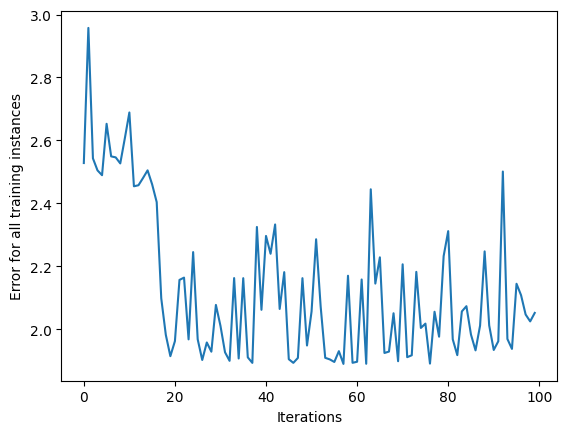

In [9]:
# Paste the NeuralNetwork class code here
# (and don't forget to add the train method to the class)

import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")